# K-Means
k개의 클러스터가 주어졌을 때 거리를 기반으로 가장 가까운 클러스터로 할당하는 것을 반복

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("customer.txt",header=0)   #도매업 고객 데이터
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [25]:
df.info()    #결측치 없음, int 형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [28]:
X=df

from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [37]:
#모형적용
from sklearn import cluster

kmeans=cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)
kmeans.fit(X)
cluster_label=kmeans.labels_
cluster_label    #예측

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 3, 1, 1, 0, 3,
       0, 1, 0, 0, 0, 4, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 3, 3, 4,
       0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1,

In [38]:
df['Cluster']=cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


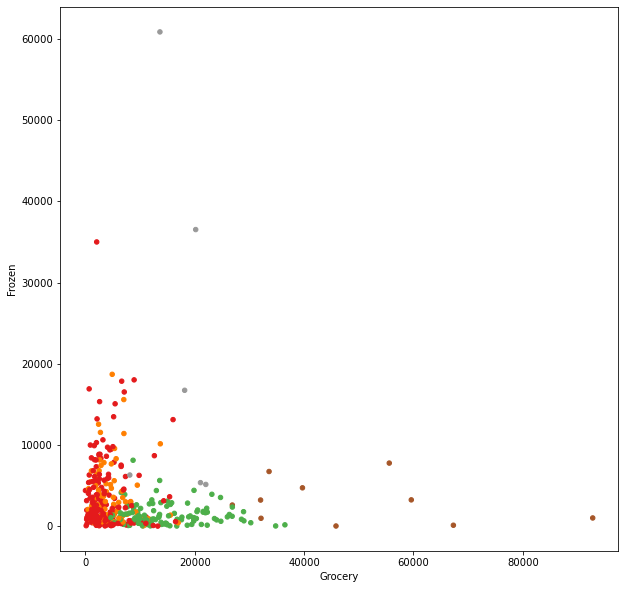

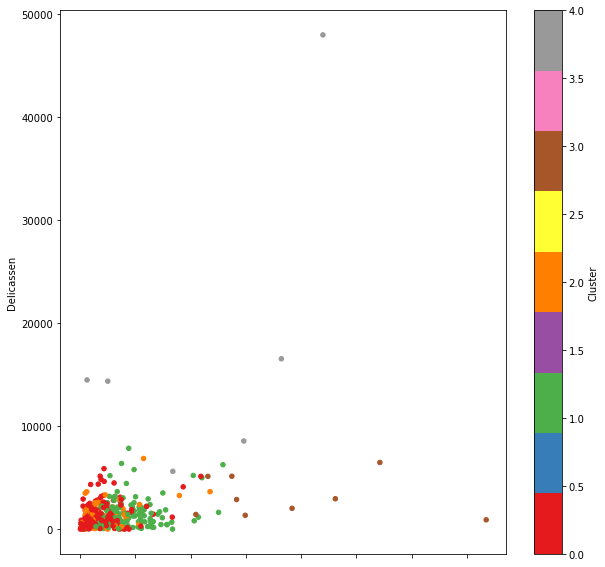

In [39]:
df.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False,figsize=(10,10))
df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()

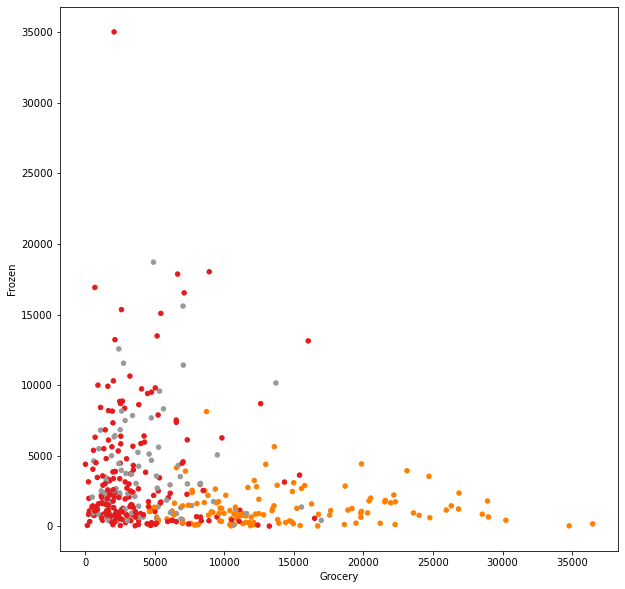

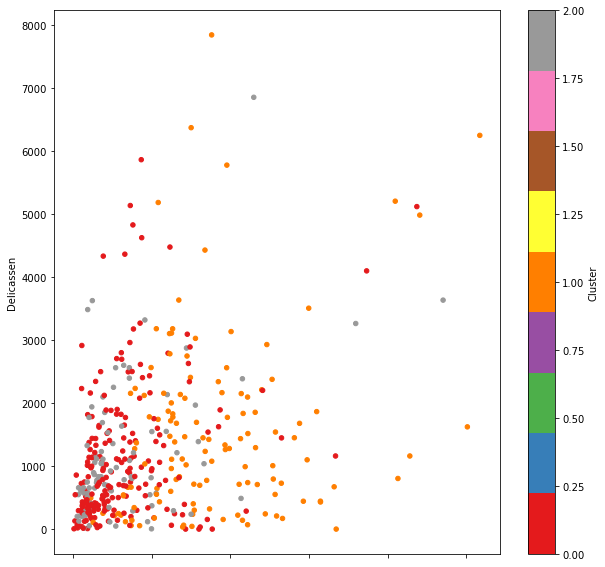

In [42]:
mask=(df['Cluster']==3)|(df['Cluster']==4)
ndf=df[-mask]
ndf.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False,figsize=(10,10))
ndf.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()


# DBSCAN
공간 밀집도를 기준으로 클러스터 구분(코어포인트,경계포인트,아웃라이어)

In [57]:
import os
print(os.getcwd())

C:\Users\user\Desktop\3-1_머신러닝


In [78]:
#중학교 졸업생의 진로현황 데이터
df=pd.read_excel('2016_middle_shcool_graduates_report.xlsx',header=0)
df=df.drop(['Unnamed: 0'],axis=1)

In [79]:
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 65.0+ KB


In [81]:
df.describe()

,코드,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000
mean,3.197590,126.532530,116.173494,0.623080,0.149684,0.004378,0.013687,0.017393,0.005251,0.080971,0.034296,0.069571,0.0,0.001670,37.491969,127.032792
std,0.804272,79.217906,76.833082,0.211093,0.102977,0.006739,0.011548,0.092006,0.007557,0.079136,0.080302,0.235630,0.0,0.003697,0.348926,0.265245
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.979940,126.639561
25%,3.000000,80.000000,71.500000,0.566500,0.065500,0.000000,0.006000,0.000000,0.000000,0.027000,0.000000,0.000000,0.0,0.000000,37.501934,126.921758
50%,3.000000,129.000000,118.000000,0.681000,0.149000,0.000000,0.012000,0.005000,0.003000,0.060000,0.000000,0.007000,0.0,0.000000,37.547702,127.013579
75%,3.000000,177.500000,161.500000,0.758000,0.224500,0.006000,0.019000,0.011000,0.007000,0.111500,0.019000,0.015000,0.0,0.003000,37.590670,127.071265
max,9.000000,337.000000,422.000000,0.908000,0.477000,0.055000,0.110000,0.940000,0.046000,0.485000,0.531000,1.000000,0.0,0.036000,37.694777,129.106974


In [86]:
mschool_map=folium.Map(location=[37.55,123.98],tiles='Stamen Terrain',zoom_start=12)
for name,lat,lng in zip(df.학교명,df.위도,df.경도):
    folium.CircleMarker([lat,lng],
                        radius=5,
                        color'brown',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=name
                       ).add_to(mschool_map)
mschool_map.save("mschool.html")

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_1812/1045521002.py, line 5)